In [1]:
%run 'lib.ipynb'
%run 'data-generator.ipynb'

In [2]:
dg = DataGenerator('/d2/caches/tf-speech/train/audio')
dg.n_mels = 64
dg.msg_w = 64

file /d2/caches/tf-speech/train/audio/left/462e1919_nohash_0.wav
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/dude_miaowing.wav at 0.14 vol
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/exercise_bike.wav at 0.71 vol
transforming pitch 2.7211794175872086
transforming speed 1.2896589625058623
left


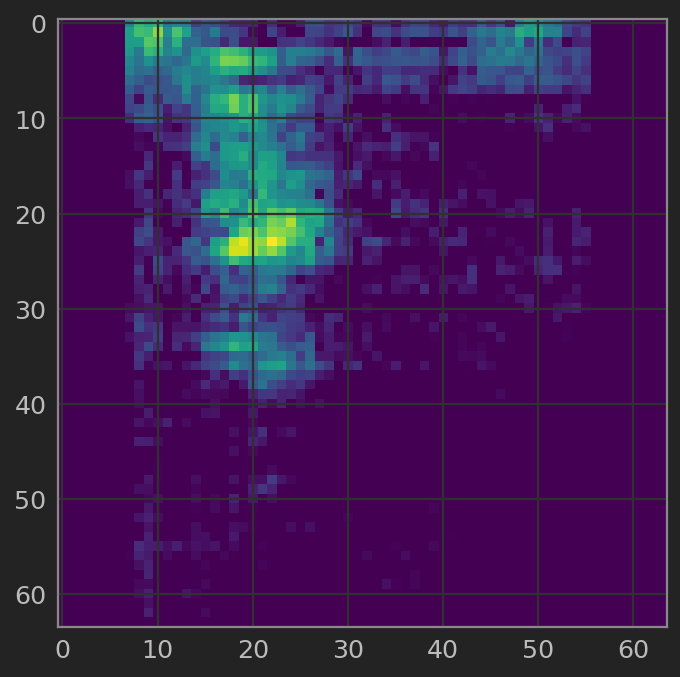

In [17]:
# try generating gen audio
dg.debug = True
a, a_label = dg.generate_audio()
print(a_label)
a_msg = dg.msg(a)
plt.imshow(a_msg)
ipd.Audio(a, rate=16000)

In [ ]:
# try mixing with noise
sr, s = wavfile.read(
    '/d2/caches/tf-speech/train/audio/go/4c4d2526_nohash_1.wav')
n = dg._load_random_segment(
    '/d2/caches/tf-speech/train/audio/_background_noise_/pink_noise.wav'
)[:len(s)]
s = dg.mix(s, 1., n, 0.05)
ipd.Audio(s, rate=sr)

In [8]:
# benchmark
from tqdm import tqdm
from collections import Counter
dg.debug = False
labels = Counter()

for i in tqdm(range(1000)):
    w, label = dg.generate_audio()
    labels[label] += 1

labels

100%|██████████| 1000/1000 [00:12<00:00, 78.05it/s]


Counter({'down': 86,
         'go': 74,
         'left': 92,
         'no': 83,
         'off': 76,
         'on': 82,
         'right': 89,
         'silence': 71,
         'stop': 96,
         'unknown': 92,
         'up': 76,
         'yes': 83})

(array([ 3225.,   288.,   188.,   107.,   115.,    82.,    51.,    25.,
            9.,     6.]),
 array([ 105.16243744,  113.16243668,  121.16243591,  129.16243515,
         137.16243439,  145.16243362,  153.16243286,  161.1624321 ,
         169.16243134,  177.16243057,  185.16242981]),
 <a list of 10 Patch objects>)

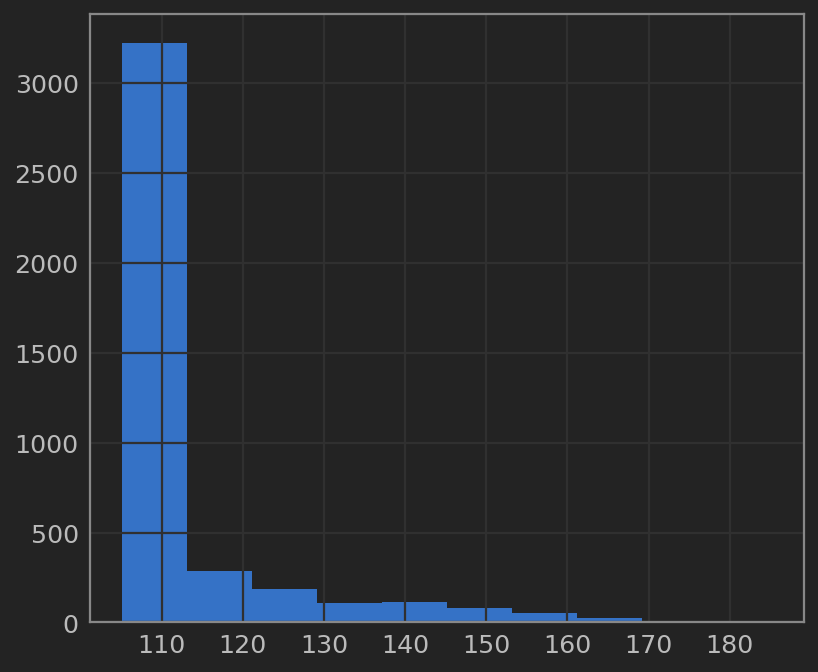

In [18]:
plt.hist(a_msg.flatten())

In [13]:
dg.debug = False
dg.compute_msg_norm_params(500)

In [19]:
a_msg_norm = dg.normalize_msg(a_msg)

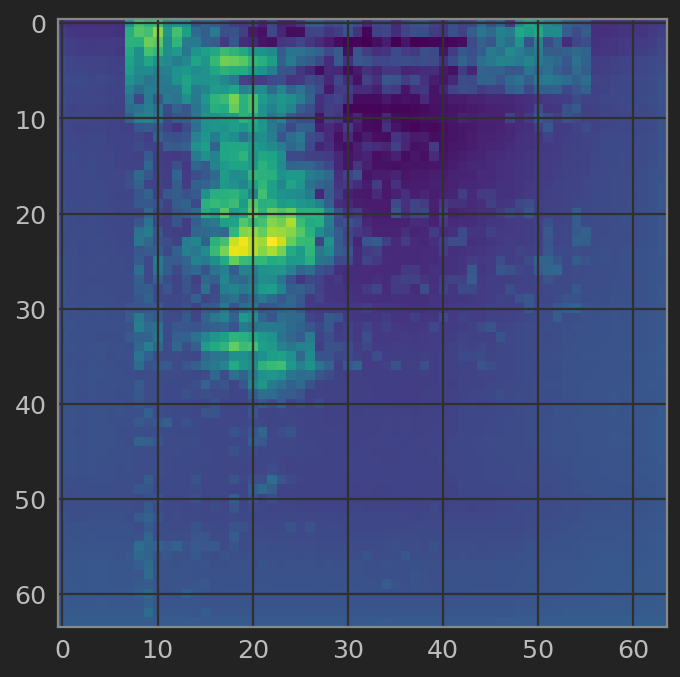

In [20]:
plt.imshow(a_msg_norm)

(array([  191.,   723.,  2548.,   237.,   142.,   126.,    79.,    31.,
           13.,     6.]),
 array([-2.11068916, -1.28710513, -0.4635211 ,  0.36006293,  1.18364697,
         2.007231  ,  2.83081503,  3.65439906,  4.47798309,  5.30156713,
         6.12515116]),
 <a list of 10 Patch objects>)

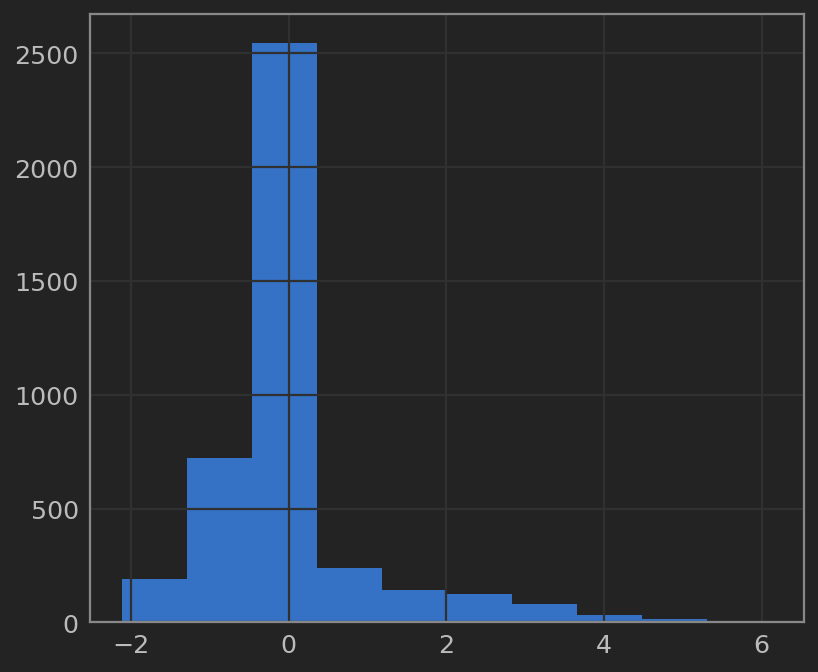

In [21]:
plt.hist(a_msg.flatten())